Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


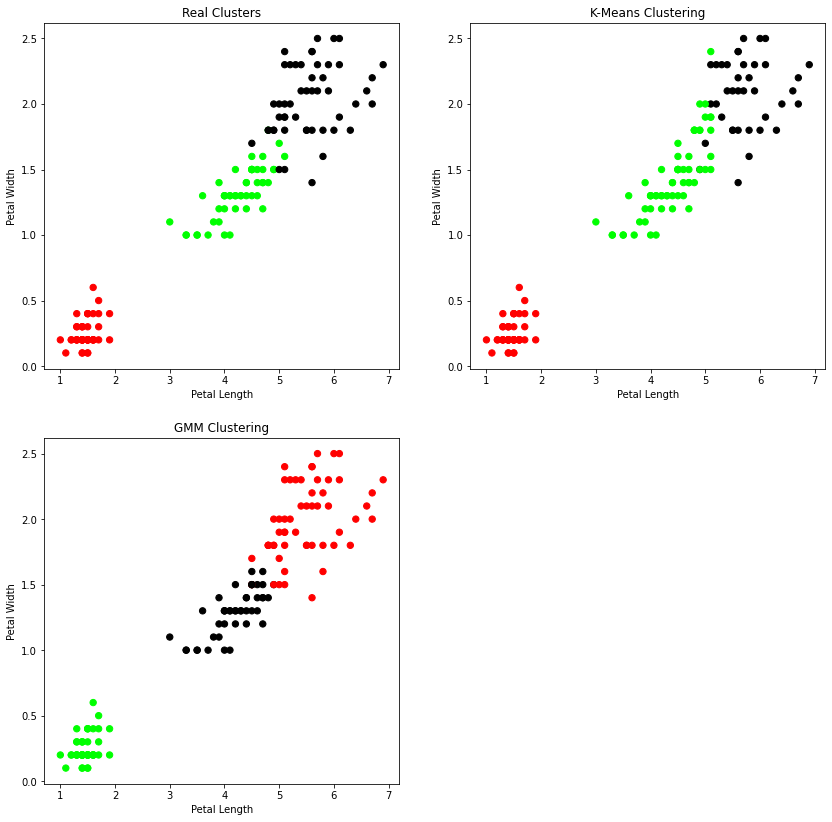

In [3]:
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans 
import pandas as pd
import numpy as np
# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns =  ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results 
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
# Plot the Original Classifications using Petal features 
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# General EM for GMM
from sklearn import preprocessing
# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')